# Business Problem

Given the growth of Cab industry in last years, the US company XYZ wants to know which of the two given cab companies can be a better opportunity to invest in, by having a deeper understaning of the market.


In [ ]:
import numpy as np
import pandas as pd
import datetime as dt 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Data Collection and Preprocessing
The first and foremost we uploaded the data and merge the dataset all toagther for further analysis. 

In [2]:
cab = pd.read_csv("C:/Users/Dinesh_Saini/Desktop/Wecloud Machine Learning/XYZ cab investment/Cab_Data.csv")
city = pd.read_csv("C:/Users/Dinesh_Saini/Desktop/Wecloud Machine Learning/XYZ cab investment/City.csv")
customers = pd.read_csv("C:/Users/Dinesh_Saini/Desktop/Wecloud Machine Learning/XYZ cab investment/Customer_ID.csv")
transaction = pd.read_csv("C:/Users/Dinesh_Saini/Desktop/Wecloud Machine Learning/XYZ cab investment/Transaction_ID.csv")

In [3]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [7]:
cab_data = pd.merge(cab, transaction, how="left", on="Transaction ID")
cab_data2 = pd.merge(cab_data, customers, how="left", on="Customer ID")
cab_data_final = pd.merge(cab_data2,city, how = 'left', on = 'City')

In [222]:
cab_data_final.head(2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Year,Profit,Month,Age bin,No of time travel,Max Travel
0,10000011,2016-08-01,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,814885,24701,2016,57.315,August,"(17, 29]",1,3
1,10000012,2016-06-01,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,814885,24701,2016,23.666,June,"(17, 29]",1,4


In [9]:
# convert the datatype of date of travel from int to datetime
cab_data_final["Date of Travel"] = pd.to_datetime(cab_data_final["Date of Travel"], format="mixed")

In [10]:
# create a new column year 
cab_data_final['Year'] = cab_data_final["Date of Travel"].dt.year

In [11]:
# create a profit column in the dataset 
cab_data_final['Profit'] = cab_data_final["Price Charged"] - cab_data_final['Cost of Trip']

In [12]:
# create a month column in the dataset
cab_data_final['Month'] = cab_data_final["Date of Travel"].dt.month_name(locale='English')

In [13]:
# calculate the missing value in the dataset
cab_data_final.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
Year                  0
Profit                0
Month                 0
dtype: int64

# EDA 

•	What is the market share for each Cab investment and what is their profit over time.
•	Growth rate of each Cab Company for the given time.
•	Which is the demand of each cab company change over time.
•	Repeat customer based on their ride experience.
•	Distance-based analysis of the profit.
•	City based presence of the cab and their profit share.
•   Price charged vs cost of trip analysis based on the city to improve the profit share.

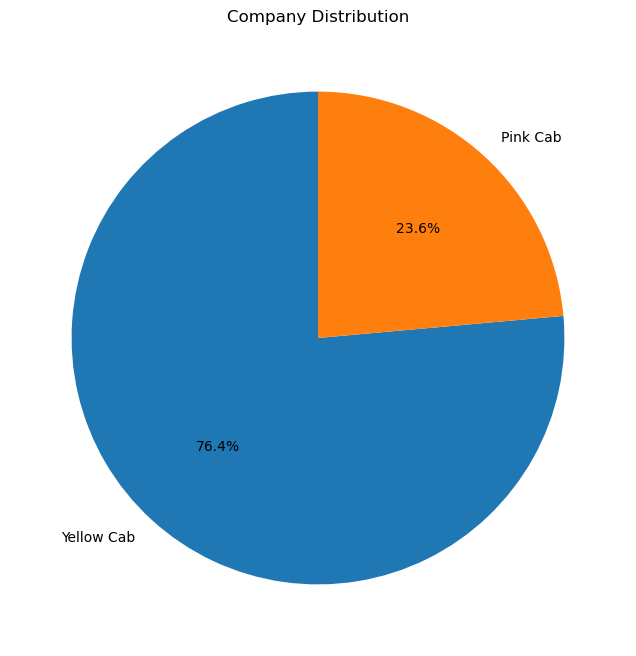

In [225]:
fig, axs = plt.subplots(1, 1, figsize=(12, 8))  
company_counts = cab_data_final["Company"].value_counts()
axs.pie(company_counts, labels=company_counts.index, autopct="%1.1f%%", startangle=90)
axs.set_title("Company Distribution")
plt.show()

The above graph shows the market share or market presence of each cab company which is higher for yellow cab as compared to pink cab.

In [16]:
profit = cab_data_final.groupby(["Company", "Year"])[["KM Travelled", "Profit"]].sum().round(2)
profit["Price Per KM"] = profit["Profit"]/profit['KM Travelled']
profit

KM Travelled       Profit  Price Per KM
Company    Year                                         
Pink Cab   2016     563509.67   1713511.22      3.040784
           2017     685823.52   2033654.91      2.965274
           2018     661739.92   1560162.19      2.357667
Yellow Cab 2016    1859978.21  13926995.43      7.487720
           2017    2214879.02  16575977.97      7.483920
           2018    2124560.24  13517399.77      6.362446

([<matplotlib.axis.XTick at 0x2caa687eb00>,
 [Text(2016, 0, '2016'), Text(2017, 0, '2017'), Text(2018, 0, '2018')])

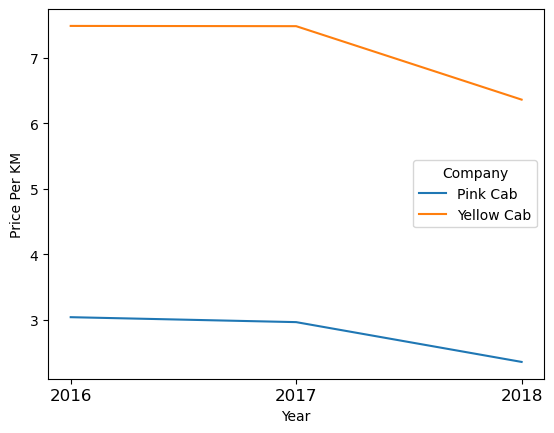

In [17]:
sns.lineplot(x = 'Year', y = 'Price Per KM', hue = 'Company', data = profit)
plt.xticks(ticks=[2016, 2017, 2018], labels=['2016', '2017', '2018'], fontsize=12)

In [18]:
cab_data_final.groupby(["Company","Payment_Mode"])["Payment_Mode"].count()

Company     Payment_Mode
Pink Cab    Card             50719
            Cash             33992
Yellow Cab  Card            164785
            Cash            109896
Name: Payment_Mode, dtype: int64

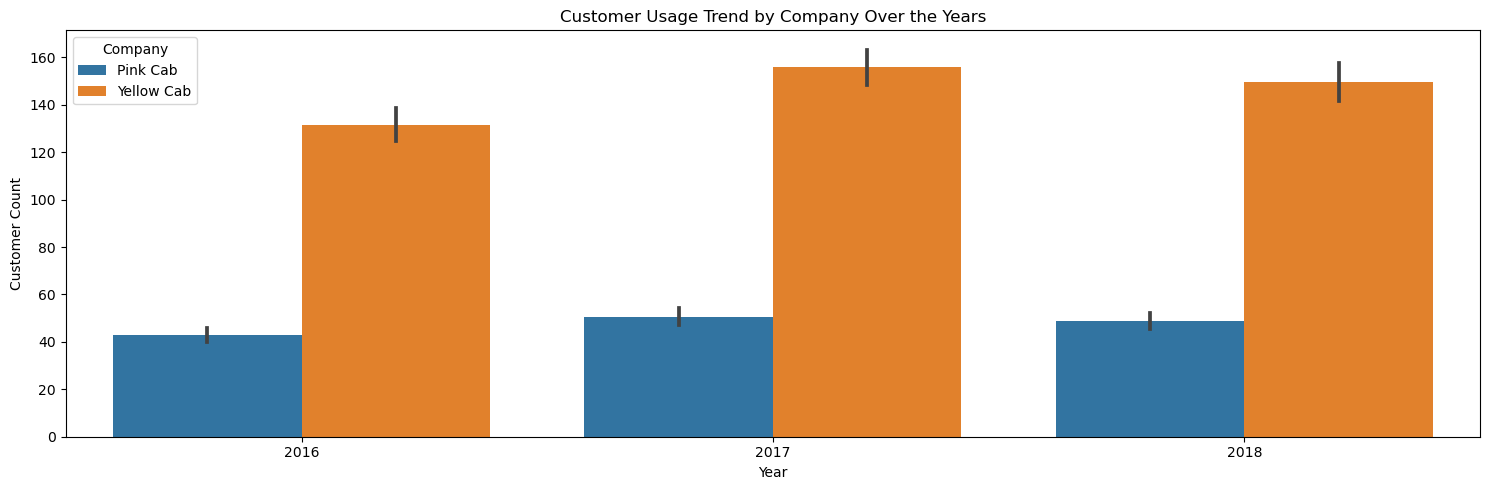

In [226]:
plt.figure(figsize=(15, 5), dpi=100)
Usuage_trend = cab_data_final.groupby(["Year",'Max Travel','Company', 'Month'])['Customer ID'].count().reset_index()
sns.barplot(data= Usuage_trend,y="Customer ID",x="Year",hue="Company")
plt.xlabel("Year")
plt.ylabel("Customer Count")
plt.title("Customer Usage Trend by Company Over the Years")
plt.legend(title="Company")
plt.tight_layout()

plt.show()

The customer prefer to use the yellow cab over the pink cab and the trend is increasing over the year for both the cab companies exact last year where there is slightly decrease in the trend for the both the companies which is very minimal there are various factore associated for that dip in usuage trend that's the scope of further analysis. 

In [46]:
import sort_dataframeby_monthorweek as sd
def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df,column_name)

In [227]:
Usuage_trend = sort_month(Usuage_trend, "Month")

<Axes: xlabel='Month', ylabel='Customer ID'>

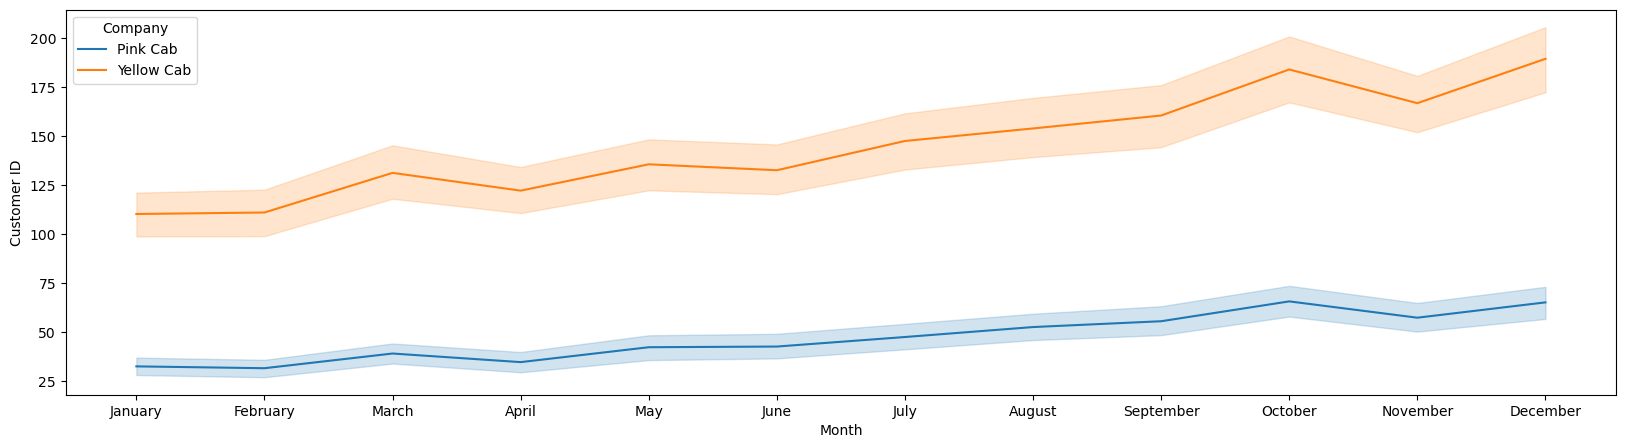

In [49]:
plt.figure(figsize=(20, 5), dpi=100)
sns.lineplot(data=Usuage_trend, y="Customer ID", x='Month', hue = 'Company')

Month wise analysis of the usuage trend it's clear from the plot that trend is in increasing pattern for both cab companies small hike for the usuage can be seen in the month of March also in month of October.

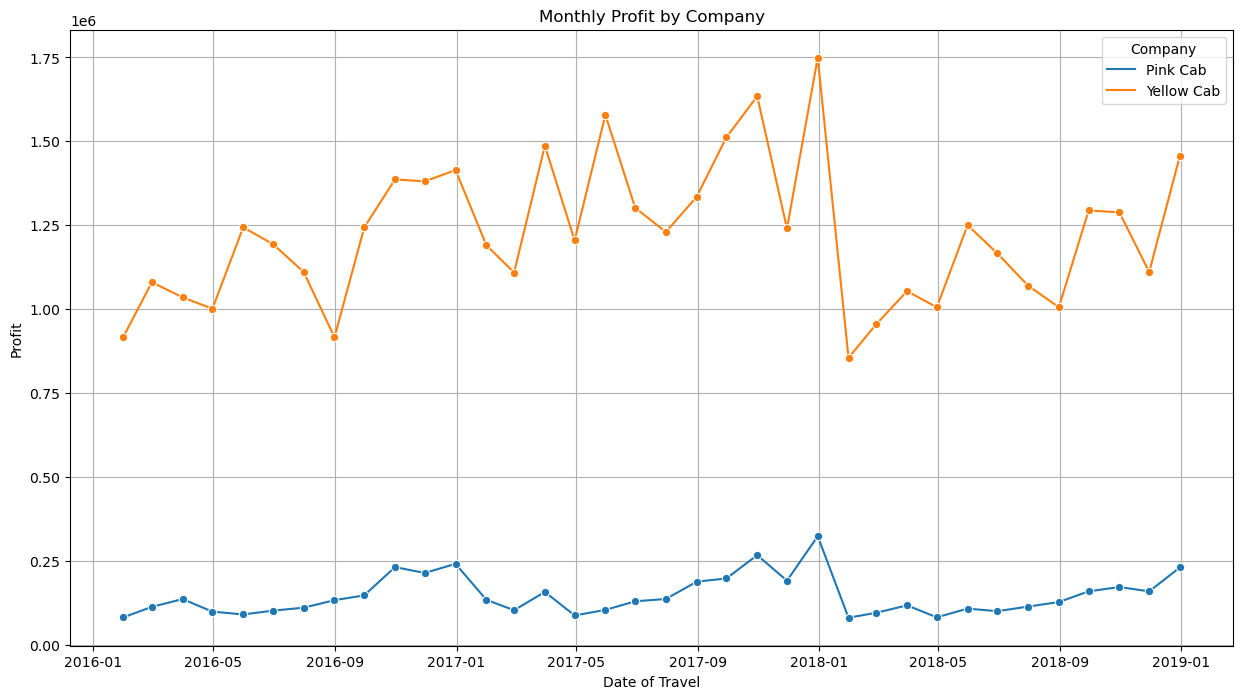

In [38]:
df_month_profit = cab_data_final.copy()
df_month_profit.set_index("Date of Travel", inplace=True)
monthly_profit = df_month_profit.groupby("Company").resample("ME")["Profit"].sum()
monthly_profit = monthly_profit.reset_index()

plt.figure(figsize=(15, 8))
sns.lineplot(x="Date of Travel", y="Profit", hue="Company", data=monthly_profit, marker="o")

plt.title("Monthly Profit by Company")
plt.xlabel("Date of Travel")
plt.ylabel("Profit")
plt.legend(title="Company")
plt.grid(True)
plt.show()


The profit share of the yellow cab is much higher than the Pink cab the trend is in increasing pattern whereas there was dip in the year of 2018 due to usuage trend dip in same year. The profit share of the pink is very small as compared to the yellow cab in case of natural disaster like Covid such as small company cannot bear the stree so it's better to make investment in the high profit making company.

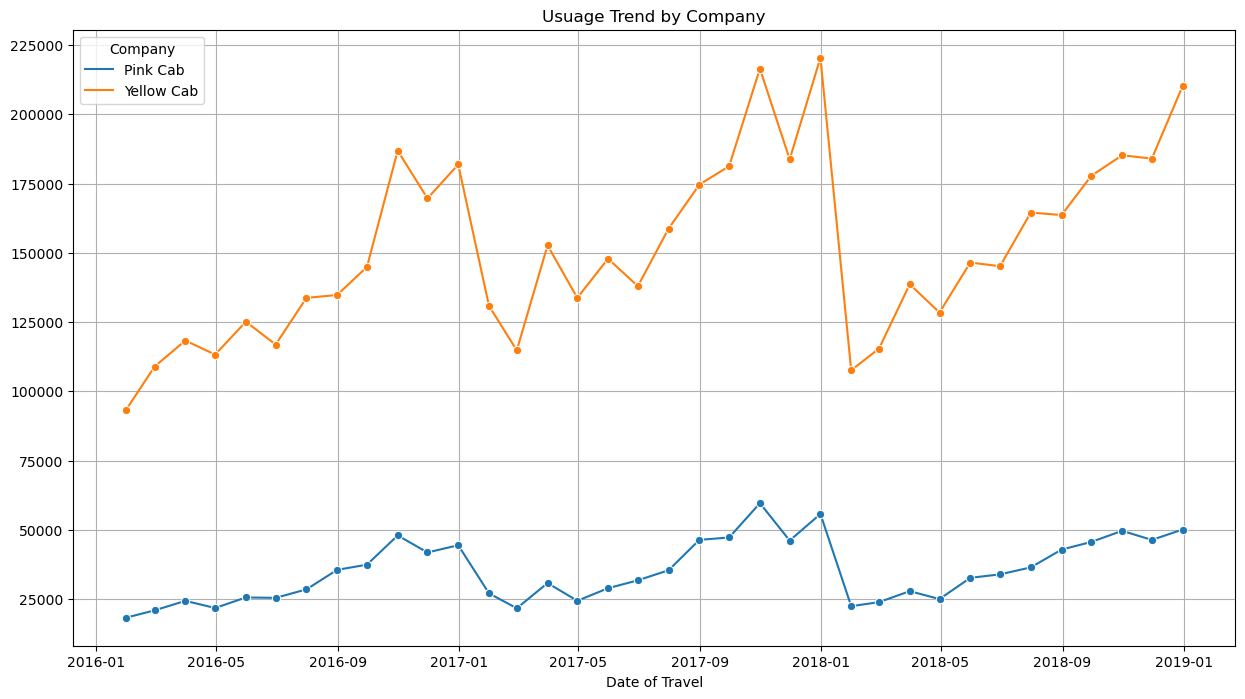

In [43]:
df_Year_profit = cab_data_final.copy()
df_Year_profit.set_index("Date of Travel", inplace=True)
Yearly_profit = df_Year_profit.groupby("Company").resample("ME")["Max Travel"].sum()
Yearly_profit = Yearly_profit.reset_index()

plt.figure(figsize=(15, 8))
sns.lineplot(x="Date of Travel", y="Max Travel", hue="Company", data=Yearly_profit, marker="o")

plt.title("Usuage Trend by Company")
plt.xlabel("Date of Travel")
plt.ylabel("")
plt.legend(title="Company")
plt.grid(True)
plt.show()

The yellow cab show higher profit its clear from the usuage trend i.e. more people like to travel with the them as compared to the pink cab, so its better to invest in company who have the higher customer base to overcome the stress of natural stress like Covid. 

In [40]:
cab_data_final['No of time travel'] = cab_data_final.groupby(['Customer ID'])['Date of Travel'].cumcount()+1
cab_data_final['Max Travel'] = cab_data_final.groupby(['Customer ID'])['No of time travel'].transform('max')

In [41]:
repeat_count = cab_data_final.groupby(['No of time travel', 'Company']).size().reset_index(name='Count')
Repeat_customer = repeat_count[repeat_count["No of time travel"] >1 ]
pivot_data = Repeat_customer.pivot(index='No of time travel', columns='Company', values='Count')

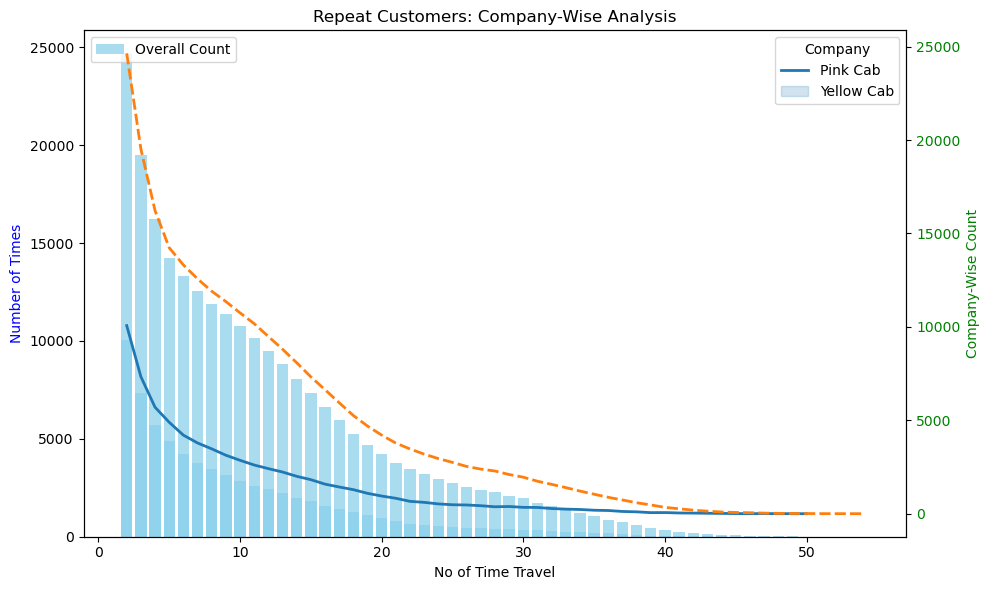

In [221]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar chart on the primary y-axis
ax1.bar(Repeat_customer["No of time travel"], Repeat_customer["Count"], color='skyblue', alpha=0.7, label='Overall Count')
ax1.set_xlabel("No of Time Travel")
ax1.set_ylabel("Number of Times", color='Blue')

# Add a secondary y-axis
ax2 = ax1.twinx()
sns.lineplot(data=pivot_data, ax=ax2, linewidth=2)
ax2.set_ylabel("Company-Wise Count", color='green')
ax2.tick_params(axis='y', labelcolor='Green')

# Add legends for both axes
ax1.legend(loc='upper left')
ax2.legend(pivot_data.columns, loc='upper right', title='Company')

# Add title and layout adjustment
plt.title("Repeat Customers: Company-Wise Analysis")
plt.tight_layout()

plt.show()


The repeat customer for the yellow cab is higher as compared to the yellow cab there can be multiple factor for that scope of further analysis but for the busniess prospective that's the busniess sign that customer are the same cab services again and again postive sign for the investment. 

In [22]:
# creating age bins for the customer
bins = [17,29,39,49,65]

cab_data_final['Age bin'] = pd.cut(cab_data_final.Age, bins=bins)

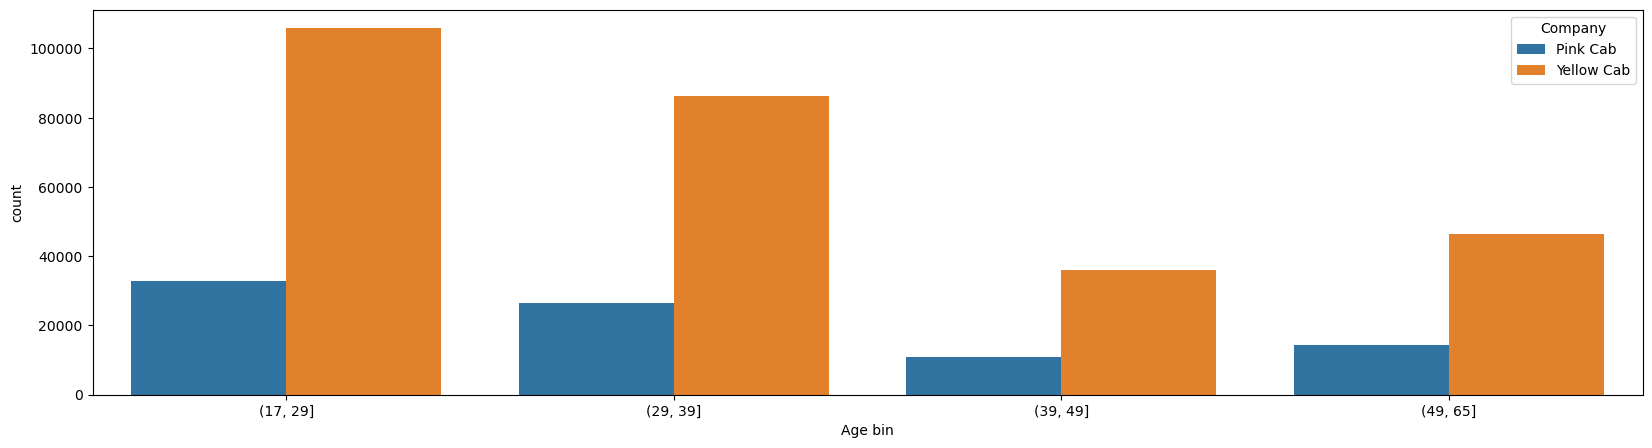

In [228]:
plt.figure(figsize=(20,5),dpi=100)
sns.countplot(data= cab_data_final, x = 'Age bin', hue= 'Company')
plt.show()

The main profit share is from the younger generation need to focus on old age group to increase profit. 

In [229]:
ages = round(cab_data_final.groupby(["Age bin","Company"])["Profit"].sum(),2).reset_index()

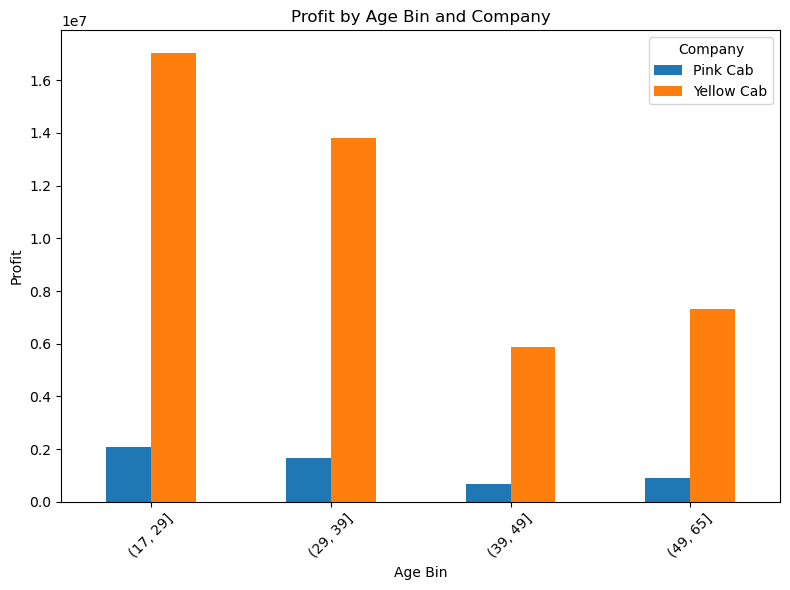

In [25]:
pivot_data = ages.pivot(index="Age bin", columns="Company", values="Profit")

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(8, 6))
pivot_data.plot(kind="bar", ax=ax, )

# Add labels and title
ax.set_xlabel("Age Bin")
ax.set_ylabel("Profit")
ax.set_title("Profit by Age Bin and Company")
ax.legend(title="Company")

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

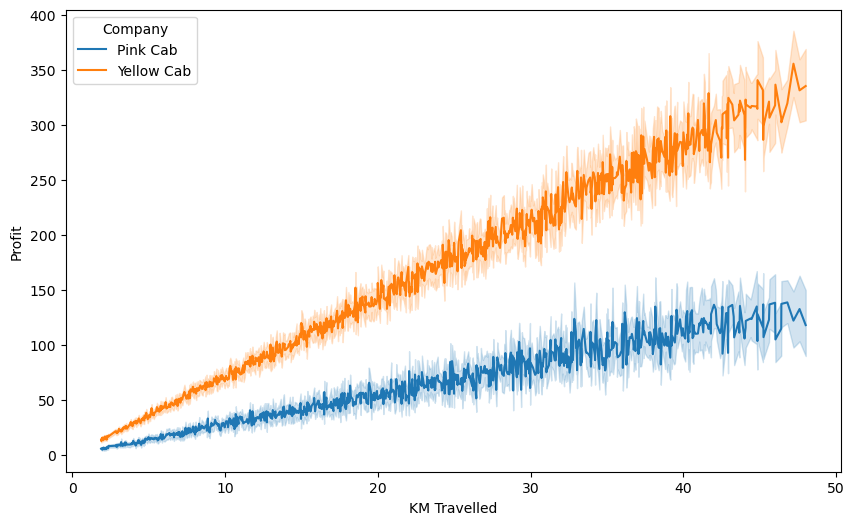

In [26]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='KM Travelled', y='Profit', hue = 'Company', data=cab_data_final)
plt.show()

KM travelled is postively correlated with the profit. 

In [28]:
yellow_cab = cab_data_final[cab_data_final['Company'] == "Yellow Cab"]
pink_cab = cab_data_final[cab_data_final['Company'] == "Pink Cab"]

In [29]:
dis_labels = ['0-10', '11-20', '21-30', '31-40', '41-50']
distance_bins = np.arange(0, yellow_cab["KM Travelled"].max() + 5, 10)
pdistance_bins = np.arange(0, pink_cab["KM Travelled"].max() + 5, 10)
yellow_cab["Distance Bin"] = pd.cut(yellow_cab["KM Travelled"],bins = distance_bins, labels = dis_labels)
pink_cab["Distance Bin"] = pd.cut(pink_cab["KM Travelled"],bins = pdistance_bins, labels = dis_labels)

In [30]:
distance = yellow_cab["Distance Bin"].value_counts().reset_index()
distance = distance.sort_values(by= "Distance Bin")
pdistance = pink_cab["Distance Bin"].value_counts().reset_index()
pdistance = pdistance.sort_values(by= "Distance Bin")
pdistance

,Distance Bin,count
3,0-10,17159
0,11-20,20413
1,21-30,20268
2,31-40,19907
4,41-50,6964


In [31]:
Dis_price = round(yellow_cab.groupby("Distance Bin")["Profit"].mean(), 2)
Dis_price = Dis_price.reset_index().astype(str)
pDis_price = round(pink_cab.groupby("Distance Bin")["Profit"].mean(), 2)
pDis_price = pDis_price.reset_index().astype(str)

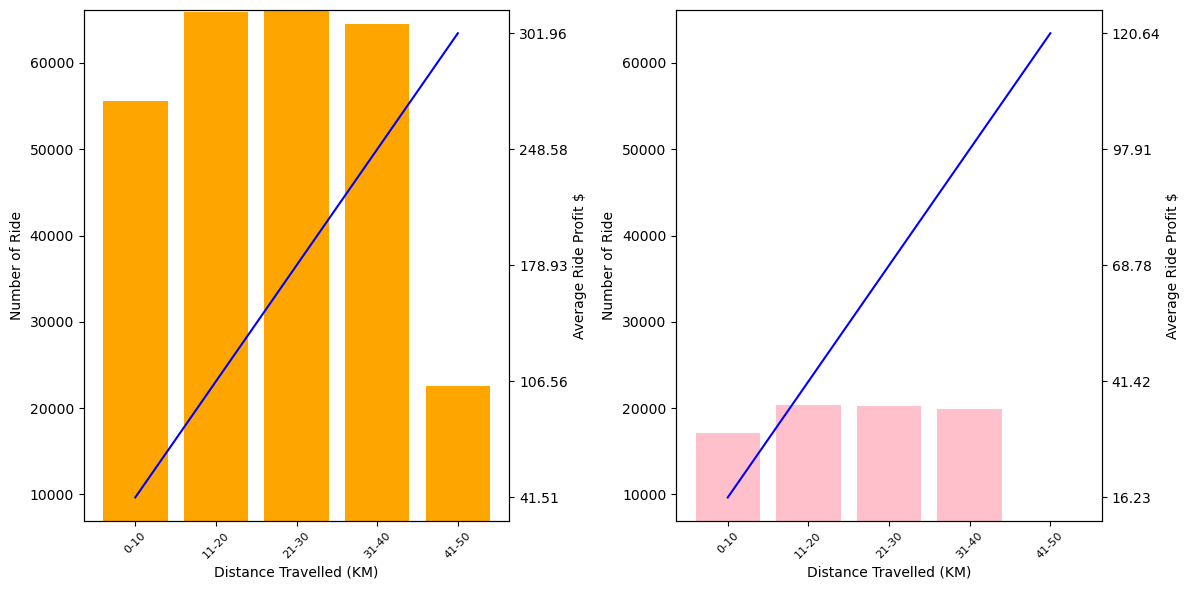

In [196]:

# Create a figure with 2 subplots side by side
fig, (ax1, ax3) = plt.subplots(ncols=2, figsize=(12, 6))

# Plotting the first dataset on the first axis (ax1)
ax2 = ax1.twinx()
ax1.bar(distance["Distance Bin"], distance["count"], color = 'orange')
ax1.set_xlabel("Distance Travelled (KM)")
ax1.set_ylabel("Number of Ride")
ax1.set_xticklabels(distance["Distance Bin"], rotation=45, size=8)
ax2.plot(Dis_price["Distance Bin"], Dis_price['Profit'], "b-")
ax2.set_ylabel("Average Ride Profit $")

# Plotting the second dataset on the second axis (ax3)
ax4 = ax3.twinx()
ax3.bar(pdistance["Distance Bin"], pdistance["count"], color = 'Pink')
ax3.set_xlabel("Distance Travelled (KM)")
ax3.set_ylabel("Number of Ride")
ax3.set_xticklabels(pdistance["Distance Bin"], rotation=45, size=8)
ax4.plot(pDis_price["Distance Bin"], pDis_price['Profit'], "b-")
ax4.set_ylabel("Average Ride Profit $")

# Set common y-limits for both plots
y_min = min(distance["count"].min(), pdistance["count"].min())
y_max = max(distance["count"].max(), pdistance["count"].max())
ax1.set_ylim(y_min, y_max)
ax3.set_ylim(y_min, y_max)

# Display the plot
plt.tight_layout()
plt.show()


Distance wise comparison of number of rides and profit it can be observed that higher number of customer uses yellow cabs and average profit they are making is higher than the pink cabs.Interesting fact is for longer distance around 41-50 Km distance category customer prefer yellow cab over pink cabs i.e. more profit means strong sign of investment

In [92]:
profit_by_city = cab_data_final.groupby(['City','Company'])["Profit"].mean().reset_index().sort_values(by = "Profit")

In [156]:
city = yellow_cab["City"].value_counts().reset_index()
city_price = round(yellow_cab.groupby("City")["Profit"].mean(), 2)
city_price= city_price.reset_index().sort_values(by = "City")
city = city.sort_values(by = "City")

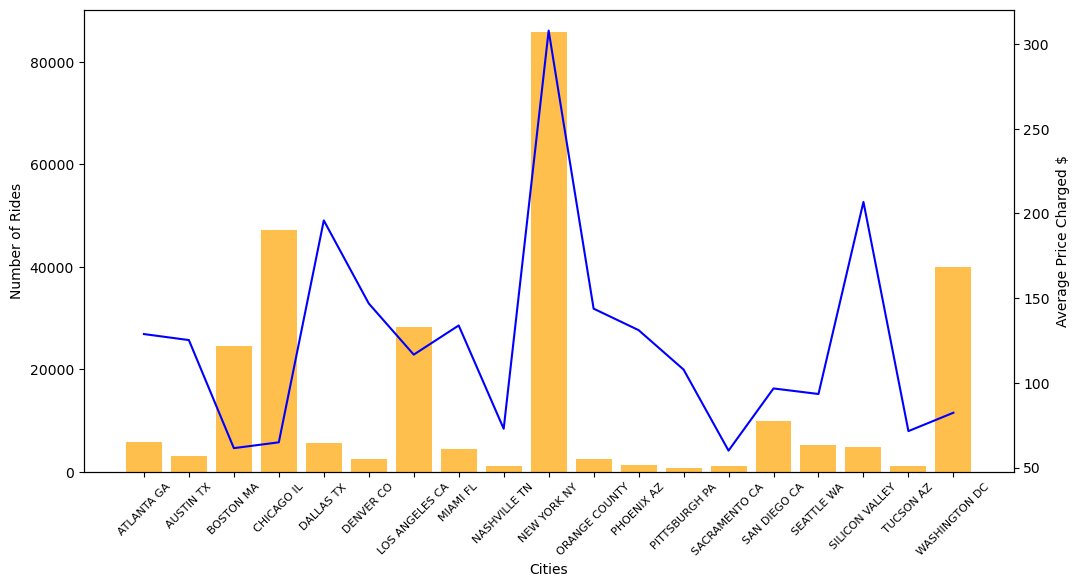

In [167]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax2 = ax1.twinx()
ax1.bar(city["City"], city["count"], color="orange", alpha=0.7)
ax1.set_xlabel("Cities")
ax1.set_ylabel("Number of Rides")
ax1.set_xticklabels(city['City'], rotation=45, size=8)
ax2.plot(city_price["City"], city_price["Profit"], "b-")
ax2.set_ylabel("Average Price Charged $")
plt.show()

In [243]:
pcity = pink_cab["City"].value_counts().reset_index()
pcity_price = round(pink_cab.groupby("City")["Profit"].mean(), 2)
pcity_price= pcity_price.reset_index().sort_values(by = "City")
pcity = pcity.sort_values(by = "City")


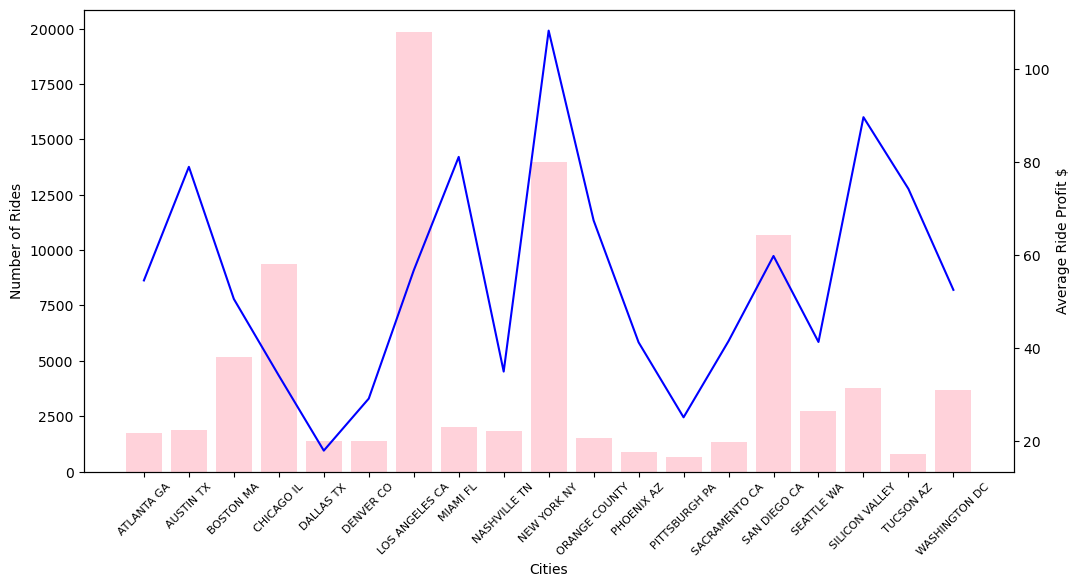

In [244]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax2 = ax1.twinx()
ax1.bar(pcity["City"], pcity["count"], color="pink", alpha=0.7)
ax1.set_xlabel("Cities")
ax1.set_ylabel("Number of Rides")
ax1.set_xticklabels(pcity['City'], rotation=45, size=8)
ax2.plot(pcity_price["City"], pcity_price['Profit'], "b-")
ax2.set_ylabel("Average Ride Profit $")
plt.show()

Most number of rides are happening at the Los Angeles and average profit per ride is higher at New york.

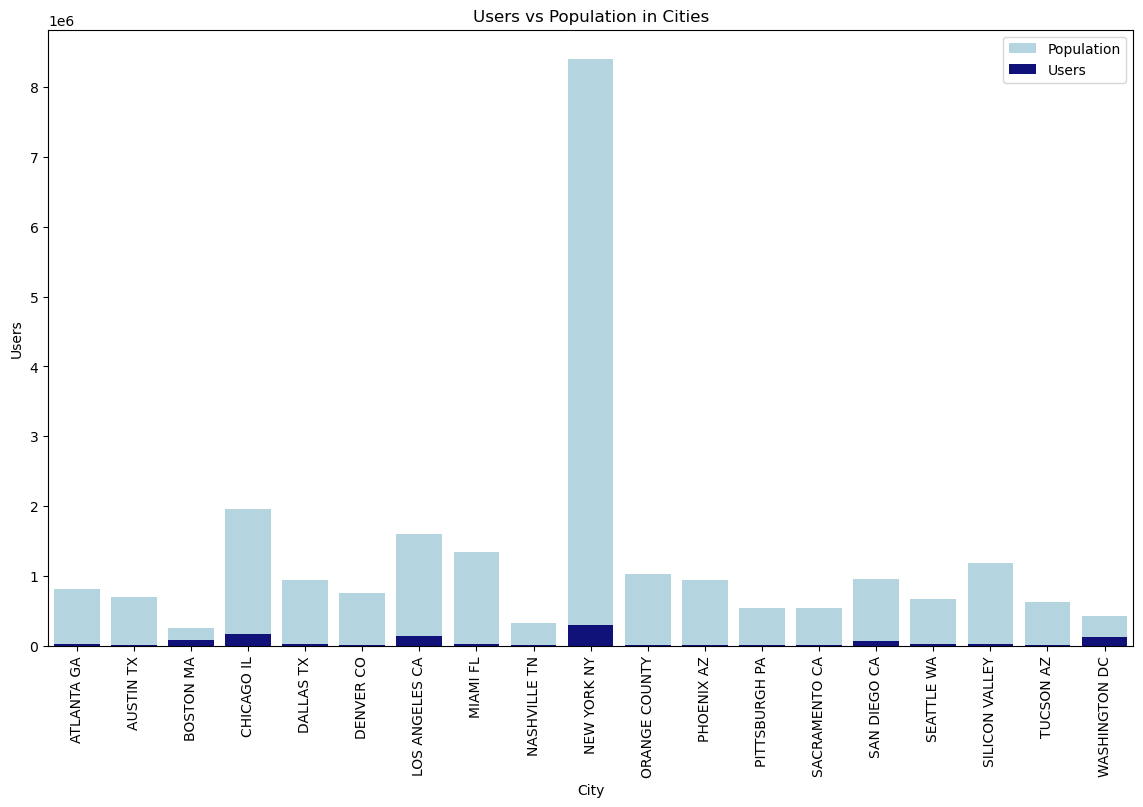

In [192]:
cab_data_final["Population"] = cab_data_final["Population"].str.replace(",", "").astype(int)
cab_data_final["Users"] = cab_data_final["Users"].str.replace(",", "").astype(int)
plt.figure(figsize=(14, 8))

sns.barplot(x="City", y="Population", data=cab_data_final, color="lightblue", label="Population")
sns.barplot(x="City", y="Users", data=cab_data_final, color="darkblue", label="Users")

plt.xticks(rotation=90)
plt.title("Users vs Population in Cities")
plt.legend()
plt.show()

Newyork city has most population and most users followed by chicago.

In [246]:
df = yellow_cab.groupby(['City'])[['Price Charged', 'Cost of Trip']].mean()

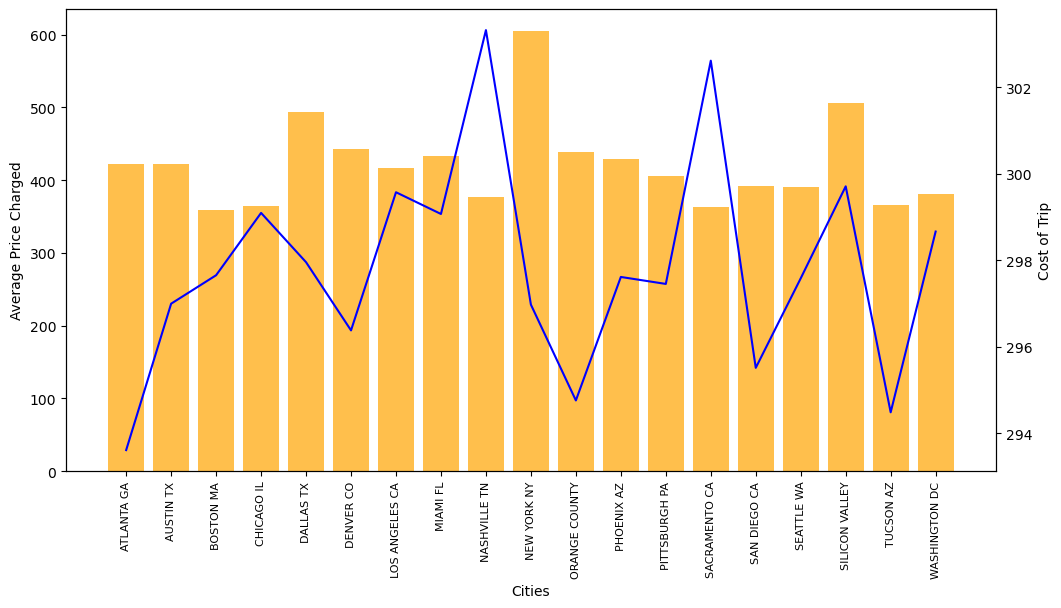

In [257]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for 'Price Charged'
ax1.bar(df.index, df["Price Charged"], color="orange", alpha=0.7)
ax1.set_xlabel("Cities")
ax1.set_ylabel("Average Price Charged")
ax1.set_xticklabels(df.index, rotation=90, size=8)

# Create a second y-axis for 'Cost of Trip'
ax2 = ax1.twinx()
ax2.plot(df.index, df['Cost of Trip'], "b-")
ax2.set_ylabel("Cost of Trip")

# Show the plot
plt.show()


Yellow cab is making more profit its all beacuse average price charged is double than the cost of trip there are various reason for that scope of further study there are cities like Nashville and sacramento the cost of trip is higher than the avergae profit.

In [248]:
pdf = pink_cab.groupby(['City'])[['Price Charged', 'Cost of Trip']].mean()

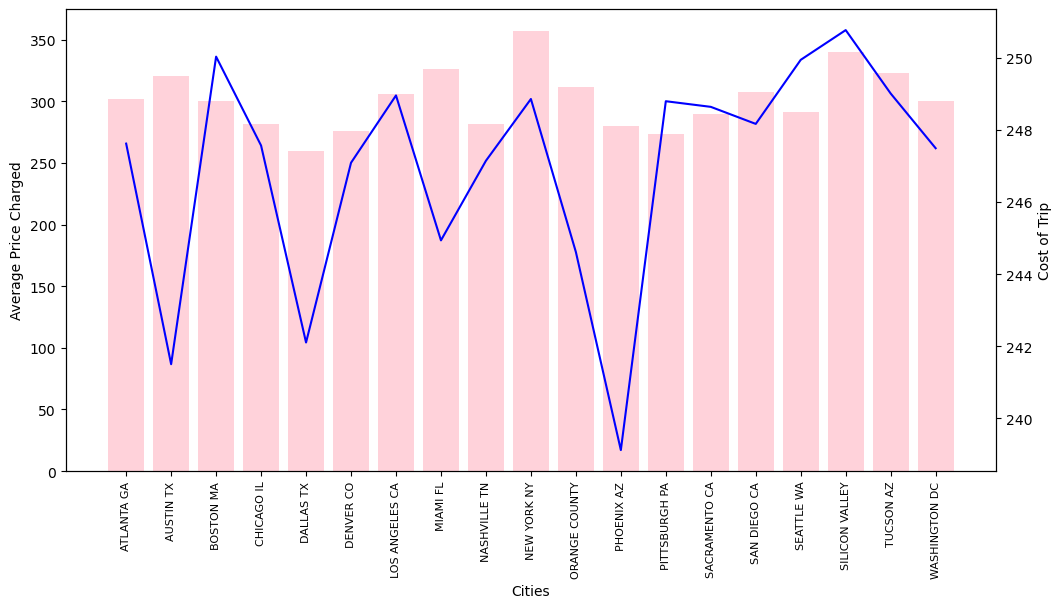

In [258]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for 'Price Charged'
ax1.bar(pdf.index, pdf["Price Charged"], color="pink", alpha=0.7)
ax1.set_xlabel("Cities")
ax1.set_ylabel("Average Price Charged")
ax1.set_xticklabels(pdf.index, rotation=90, size=8)

# Create a second y-axis for 'Cost of Trip'
ax2 = ax1.twinx()
ax2.plot(pdf.index, pdf['Cost of Trip'], "b-")
ax2.set_ylabel("Cost of Trip")

# Show the plot
plt.show()


Pink cab as compared to the yellow cab is charging very marginal prices on average as compared to the cost of the trip.

# Results

Yellow cabs dominant the market share and their profit increase at the steady rate where the pink cab profit is growing at the constant rate. 

Yellow cab charges more to their customer compared to the pink cab still their customer loyalty rate is higher than the pink cab.

Average price charged to cost of the trip is double for the yellow cab comapred to pink cab.

Higher KM is postively correlated with the profit and customer prefer to go with the yellow cabs for the longer trips.

New york emerge as the signoficant profitable city for both the cab companies but the number of rides is higher for the yellow cabs.

According to the data we have analysed, it is recommended to invest in Yellow Cab, since it surpasses Pink Cab in almost all factors examined.